# Quickstart: Survey

learn how to generate a survey

In [1]:
from skysurvey import survey

let's start with two predefined survey. A generic HealpixSurvey (based on healpix sky segmentation) 
and a real one ZTF (based on polygon sky segmentation)

### Healpix Survey

In [2]:
hpsurvey = survey.HealpixSurvey(9)

Let's draw the equivalent of 4 years of observations assuming 1000 healpix pixel pointings per day

Remark that, as such mjd_range and size are drawn independenly so, 1000 pointing per day is an average. 

In [3]:
%%time
hpsurvey.draw_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     ra_range=[-30,90], 
                    inplace=True)  # set the self.data and do not return a new HealpixSurvey

CPU times: user 2.67 s, sys: 134 ms, total: 2.81 s
Wall time: 2.81 s


Remark: you could have load it directly this way using the ``from_random`` classmethod

In [4]:
%%time
hpsurvey = survey.HealpixSurvey.from_random(nside=9, 
                                     size=365*4*1000, # number of observation 
                                     bands=["ztf:g","ztf:r","ztf:i"],
                                     mjd_range=[56000, 56000+365*4], 
                                     skynoise_range=[180,210], 
                                     ra_range=[-30,90])

CPU times: user 2.81 s, sys: 71.4 ms, total: 2.88 s
Wall time: 2.88 s


In [5]:
hpsurvey.data # Show the data generated. time, band sky noise, gain, zp and fieldid.

,index,mjd,band,skynoise,gain,zp,fieldid
0,551839,56000.003906,ztf:i,196.617020,1.0,25.0,719
1,1348736,56000.007812,ztf:r,202.884354,1.0,25.0,537
2,114679,56000.007812,ztf:g,206.403152,1.0,25.0,237
3,166625,56000.007812,ztf:i,201.249756,1.0,25.0,281
4,987224,56000.007812,ztf:i,208.462891,1.0,25.0,124
...,...,...,...,...,...,...,...
1459995,1010984,57459.996094,ztf:i,197.845139,1.0,25.0,317
1459996,337579,57459.996094,ztf:i,200.270432,1.0,25.0,290
1459997,412011,57459.996094,ztf:r,180.047531,1.0,25.0,108
1459998,1080495,57460.000000,ztf:r,209.244919,1.0,25.0,587


Let's get the number of time a 'field' has been observed

In [6]:
hpsurvey.get_fieldstat("size") 

fieldid
253    2204
283    2177
168    2171
139    2151
469    2143
       ... 
206    1930
115    1930
507    1922
508    1900
216    1884
Name: count, Length: 720, dtype: int64

These are just short cut to pandas dataframe contained in self.data

So you can play.

Let's measure the number of observation we have per day and per band

In [7]:
data = hpsurvey.data.copy()
data["day"] = data["mjd"].astype(int)

In [8]:
dailybands = data.groupby(["day","band"]).size()
dailybands

day    band 
56000  ztf:g    346
       ztf:i    353
       ztf:r    345
56001  ztf:g    358
       ztf:i    352
               ... 
57458  ztf:r    311
57459  ztf:g    371
       ztf:i    331
       ztf:r    339
57460  ztf:r      2
Length: 4381, dtype: int64

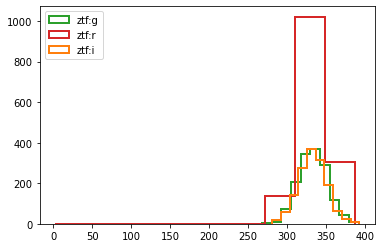

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()

prop = dict(lw=2, histtype="step")
ax.hist(dailybands.xs("ztf:g", level=1), color="tab:green", label="ztf:g", **prop) 
ax.hist(dailybands.xs("ztf:r", level=1), color="tab:red", label="ztf:r",**prop)
ax.hist(dailybands.xs("ztf:i", level=1), color="tab:orange", label="ztf:i",**prop)
ax.legend(loc='best')

#### Get the field of a target

This is an important feature that enable us to know whic field contains which target

In [10]:
hpsurvey.radec_to_fieldid([40, 90])

189

In [11]:
import numpy as np
# remark that, doing that this way, it won't be homogeneous.
ra_flat = np.random.uniform(-30, 90, 1000)
dec_flat = np.random.uniform(0, 360, 1000)
hpsurvey.radec_to_fieldid([ra_flat,dec_flat])

array([236,   4, 137, 346, 443, 291, 603, 117,   2, 565, 413,  83, 346,
       614,   1, 707,  92, 564, 550,   0, 390, 380, 684, 482, 349, 243,
       147,   1,   4, 251, 212, 531,  72,   9, 212,   3, 322,  86,  31,
        17, 231, 505, 206, 693, 379, 700, 120, 645, 569,  14, 292, 382,
        92, 336, 360, 553,  51, 163,  56, 369, 120, 679, 153, 485,  36,
       537, 674,   1,  34, 651, 140,  15,  76, 633,  28,  78, 224, 147,
       176, 578, 692, 531,  46, 278, 426, 684, 156, 639,   2,   6, 381,
       439, 308, 139,  22, 508,  26, 473,  76,  92,   1, 272, 404, 221,
        40, 704, 592, 149, 544, 584, 244, 669, 515, 419,  36,  59, 460,
       228, 178, 532, 347, 698,   6,  55,   2, 395, 648,  15, 441, 463,
       657,   2, 369, 202, 520,  89, 483, 574, 161,  22, 127, 623, 599,
       128,  50,  69, 117, 192, 629,  15, 127, 230, 655, 547,  70,  20,
        45, 118,   4, 681,  15,   3, 174, 364,  78, 126, 386, 285, 306,
         3, 127, 572, 601,  75,  54, 352, 163,   0,  60,   8,  8

### ZTF, a polygon survey

polygon survey are surveys which pointings are defined by a (potentially very long) list of fieldid. (see self.

In [13]:
from skysurvey.survey import ZTF

random is using the real ZTF field definition, but enables you to generate a random draw (unrealistic) as for HealpixSurvey

In [14]:
%%time
ztf = ZTF.from_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     )

CPU times: user 2.8 s, sys: 62.8 ms, total: 2.87 s
Wall time: 2.88 s


If you have a list of observation have these data. load directly a ztf instance with that

In [15]:
%%time
other_ztf = ZTF(data=data)

CPU times: user 33.2 ms, sys: 4.53 ms, total: 37.7 ms
Wall time: 37.1 ms


In [16]:
other_ztf.get_fieldstat("size")

fieldid
253    2204
283    2177
168    2171
139    2151
469    2143
       ... 
206    1930
115    1930
507    1922
508    1900
216    1884
Name: count, Length: 720, dtype: int64

**Next let's join targets and survey**